# Self Driving Car Engineer Term 1 Project 2 Solution

## Load Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file="./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train, size = train['features'], train['labels'], train['sizes']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Visualize Data

View a sample from the dataset.

11


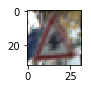

In [29]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print(y_train[index])

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [23]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train)

n_validation =  len(X_valid)

n_test =  len(X_test)

image_shape = X_test[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

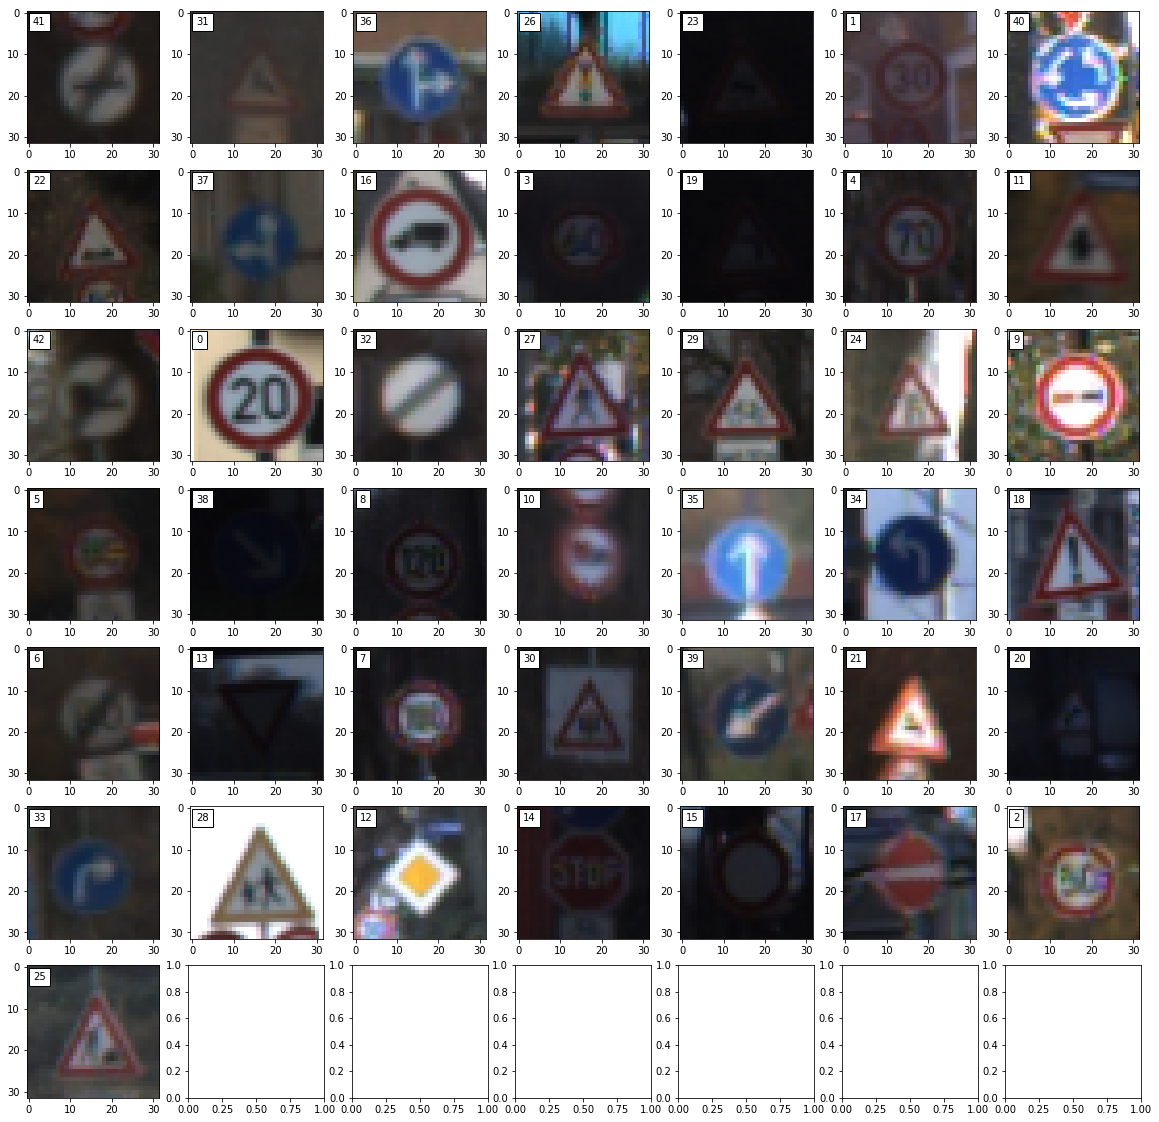

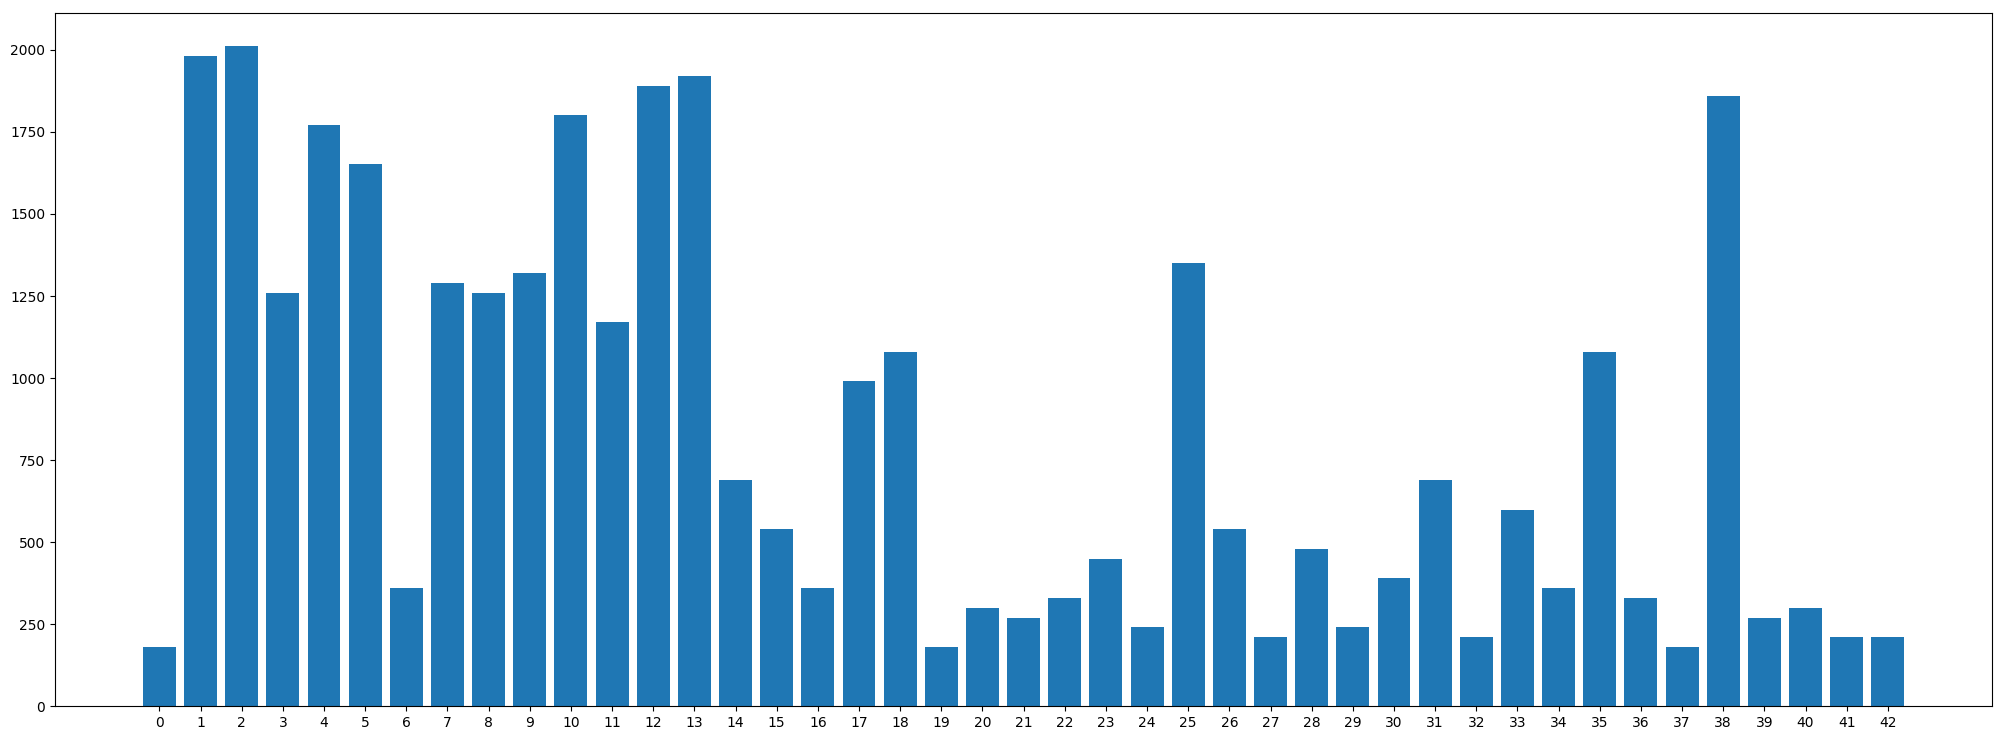

In [16]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

# Here i draw all first instances of unique German traffic signs and print their id's
labels = []
    
fig, axarr = plt.subplots(nrows=7, ncols=7, figsize=(20,20))
    
i = 0
for row in range(7):
    for col in range(7):
        if len(labels) < n_classes:
            while (y_train[i] in labels):
                i += 1
            labels.append(y_train[i])
            image = X_train[i].squeeze()
            axarr[row, col].imshow(image)
            axarr[row, col].text(1, 3, y_train[i], bbox={'facecolor': 'white', 'pad': 4})
        
plt.show()





# With the upcoming code the distribution of all classes in the training dataset is shown 
# using a bar graph

how_many_each = [0] * n_classes    # the number of each class in the training set
labels = []                        # sequential numbers of classes from 0 to 42 for x_axis

for i in range( n_classes):
    labels.append(i) 

for index in range(n_train):
    how_many_each[y_train[index]]+=1
  
    
plt.rcdefaults()

# Set figure width to 25 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
fig, ax = plt.subplots()

ax.bar(labels, how_many_each,tick_label=labels)

ax.set_xticklabels(labels)
plt.show()

%matplotlib inline


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps 
### could include converting to grayscale, etc.
 
# A normalize function defined which normalizes pixel values by (pixel-128)/128 method.

def normalize(X):
    X_norm = np.subtract(X,128.0)
    return (np.divide(X_norm,128.0))


The training data first shuffled here.

In [5]:
from sklearn.utils import shuffle

X_train_shuff, y_train_shuff = shuffle(normalize(X_train), y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [5]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## Model Architecture
I took the [LeNet-5] architecture as basis. I got the same hyper variables. I'm planning to tune hyper variables, and insert extra convolution and/or fully connected layers with trial and error.

### Input
The LeNet architecture accepts a 32x32xC image as input, so our data is already 32X32.

### Architecture
Same as LeNet for the beginning.

#### After lots of trial and errors
I have seen that adding extra convolutional and/or fully connected layers to LeNet network didn't have much impact on the results, got worse results mostly. Then i have changed my mind to fine tune hyper parameters which i got better results with some specific learning rates. For example, while 0.001, 0.002 and 0.004 gives better results, i got far worse results with values under 0.001 and values over 0.005. Though it is interesting to note that some between values (e.g. 0.0015, 0.003) gave worse results either. I'm not sure what caused this, but this tells me that choosing of the learning rate is pretty important. 

### Output
Return the result of the 2nd fully connected layer.

In [6]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)


    # SOLUTION: Layer 2_1: Convolutional. Output = 10x10x32.
#    conv2_1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 16, 32), mean = mu, stddev = sigma))
#    conv2_1_b = tf.Variable(tf.zeros(32))
#    conv2_1   = tf.nn.conv2d(conv2, conv2_1_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_1_b
    
    # SOLUTION: Activation.
#    conv2_1 = tf.nn.relu(conv2_1)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)


    # SOLUTION: Layer 3_1: Fully Connected. Input = 400. Output = 120.
#    fc1_1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
#    fc1_1_b = tf.Variable(tf.zeros(120))
#    fc1_1   = tf.matmul(fc1, fc1_1_W) + fc1_1_b
    
    # SOLUTION: Activation.
#    fc1_1    = tf.nn.relu(fc1_1)


    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

In [8]:
rate = 0.004 # was 0.001 originally 

# if we set learning rate more than 0.005 than it cause the network to become unstable

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# The probs parameter added to calculate softmax probabilities of each German sign found on
# internet.
probs = tf.nn.softmax(logits)  

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

### What has been done in the project?
1 - The training data has been normalized 

In [13]:
X_valid_norm = normalize(X_valid)
EPOCHS = 20 # was 10 originally

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_shuff, y_train_shuff = shuffle(X_train_shuff, y_train_shuff)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuff[offset:end], y_train_shuff[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_norm, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.849

EPOCH 2 ...
Validation Accuracy = 0.889

EPOCH 3 ...
Validation Accuracy = 0.914

EPOCH 4 ...
Validation Accuracy = 0.896

EPOCH 5 ...
Validation Accuracy = 0.907

EPOCH 6 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.911

EPOCH 8 ...
Validation Accuracy = 0.919

EPOCH 9 ...
Validation Accuracy = 0.916

EPOCH 10 ...
Validation Accuracy = 0.933

EPOCH 11 ...
Validation Accuracy = 0.934

EPOCH 12 ...
Validation Accuracy = 0.903

EPOCH 13 ...
Validation Accuracy = 0.895

EPOCH 14 ...
Validation Accuracy = 0.919

EPOCH 15 ...
Validation Accuracy = 0.909

EPOCH 16 ...
Validation Accuracy = 0.931

EPOCH 17 ...
Validation Accuracy = 0.933

EPOCH 18 ...
Validation Accuracy = 0.924

EPOCH 19 ...
Validation Accuracy = 0.911

EPOCH 20 ...
Validation Accuracy = 0.934

Model saved


In [25]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(normalize(X_valid), y_valid)
    print("Validation Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Validation Set Accuracy = 0.934


In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(normalize(X_train), y_train)
    print("Training Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Training Set Accuracy = 0.989


In [27]:
#print(X_valid)
#print(y_valid)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(normalize(X_test), y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Test Set Accuracy = 0.913


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

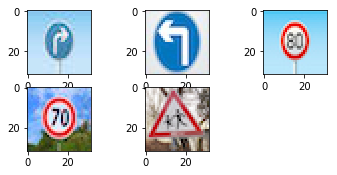

In [12]:
### Load and Output the Images

import matplotlib.image as img
import numpy as np

image = [[]]
y_image = np.array([33,34,5,4,28])
y_image.transpose()

image[0] = img.imread('./test_pics/1_1.jpg')
image.append(img.imread('./test_pics/2_1.jpg'))
image.append(img.imread('./test_pics/3_1.jpg'))
image.append(img.imread('./test_pics/4_1.jpg'))
image.append(img.imread('./test_pics/5_1.jpg'))

# Test to see image dimensions are really 32x32x3
# for i in range(len(image)):
#    print(np.shape(image[i]))
    
fig = plt.figure()
ax1 = fig.add_subplot(3,3,1)
ax1.imshow(image[0])
ax2 = fig.add_subplot(3,3,2)
ax2.imshow(image[1])
ax3 = fig.add_subplot(3,3,3)
ax3.imshow(image[2])
ax4 = fig.add_subplot(3,3,4)
ax4.imshow(image[3])
ax4 = fig.add_subplot(3,3,5)
ax4.imshow(image[4])

X_image_norm = normalize(image)

In [13]:
with tf.Session() as sess1:
    saver.restore(sess1, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_image_norm, y_image)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet_1
Test Accuracy = 0.600


In [22]:
with tf.Session() as sess2:
    saver.restore(sess2, tf.train.latest_checkpoint('.'))

    soft_probs = sess2.run(probs, feed_dict={x: X_image_norm, y: y_image}) 
    soft_probs = sess2.run(tf.nn.top_k(soft_probs, k=5))

    print(soft_probs)
    


INFO:tensorflow:Restoring parameters from ./lenet_1
TopKV2(values=array([[  9.98697996e-01,   1.25356019e-03,   3.82465405e-05,
          8.20272271e-06,   1.98611929e-06],
       [  5.72259486e-01,   4.26285505e-01,   1.02806056e-03,
          4.26921993e-04,   9.48063761e-09],
       [  9.98574018e-01,   1.39566930e-03,   1.84210949e-05,
          1.17608870e-05,   4.53256099e-08],
       [  9.99726236e-01,   2.73593265e-04,   8.53960742e-08,
          3.32770615e-14,   1.65586397e-15],
       [  8.88988376e-01,   1.10632114e-01,   3.24764027e-04,
          4.73344116e-05,   6.43451131e-06]], dtype=float32), indices=array([[28, 35, 38, 11, 12],
       [34, 22, 38, 35, 12],
       [ 5,  7,  1,  2, 10],
       [ 4,  0,  5,  8,  1],
       [36, 28, 23, 29,  5]], dtype=int32))
